In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('cardio_dataset.csv')

In [3]:
dataset = df.values


In [4]:
data = dataset[:,0:7]
target = dataset[:,7]

In [5]:
from sklearn.preprocessing import MinMaxScaler

target = np.reshape(target, (-1,1)) # convet 2d array

scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

# scaler_target = MinMaxScaler(feature_range=(0,10)) #we can give any range

scaler_data.fit(data)
scaler_target.fit(target)

# data_scaled = scaler_data.fit_transform(data)

data_scaled = scaler_data.fit_transform(data)
target_scaled = scaler_target.fit_transform(target)

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled, test_size=0.2)

# FFNN Architecture

In [7]:
from keras.models import Sequential
import keras.layers as layers
from keras.layers import Dropout
import numpy as np

model = Sequential()
model.add(layers.Dense(128, input_dim=7, activation='sigmoid', kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-trainabl

In [9]:
from sklearn.metrics import r2_score
import keras

class CustomCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self,epoch,logs=None):
        predicted_result = model.predict(test_data)
        r2 = r2_score(test_target, predicted_result)
        print('r2 score: ', r2)

In [10]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('models/model-{epoch:03d}.model', monitor='val_loss', save_best_only=True, mode='auto')

In [11]:
history = model.fit(train_data, train_target, epochs=200, validation_data=(test_data, test_target), callbacks=[checkpoint])

# history = model.fit(data_scaled, target_scaled, epochs=200, validation_split=0.2)

Epoch 1/200
167/167 [==============================] - 2s 10ms/step - loss: 0.1586 - mae: 0.2731 - val_loss: 0.0334 - val_mae: 0.1181
Epoch 2/200
167/167 [==============================] - 1s 6ms/step - loss: 0.0448 - mae: 0.1631 - val_loss: 0.0272 - val_mae: 0.1092
Epoch 3/200
167/167 [==============================] - 1s 6ms/step - loss: 0.0356 - mae: 0.1441 - val_loss: 0.0235 - val_mae: 0.1088
Epoch 4/200
167/167 [==============================] - 1s 6ms/step - loss: 0.0316 - mae: 0.1351 - val_loss: 0.0233 - val_mae: 0.1081
Epoch 5/200
167/167 [==============================] - 1s 6ms/step - loss: 0.0285 - mae: 0.1285 - val_loss: 0.0228 - val_mae: 0.1074
Epoch 6/200
167/167 [==============================] - 1s 6ms/step - loss: 0.0261 - mae: 0.1219 - val_loss: 0.0218 - val_mae: 0.1068
Epoch 7/200
167/167 [==============================] - 1s 7ms/step - loss: 0.0242 - mae: 0.1173 - val_loss: 0.0210 - val_mae: 0.1040
Epoch 8/200
167/167 [==============================] - 1s 6ms/step -

167/167 [==============================] - 1s 8ms/step - loss: 0.0068 - mae: 0.0559 - val_loss: 0.0040 - val_mae: 0.0394
Epoch 32/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0068 - mae: 0.0561 - val_loss: 0.0043 - val_mae: 0.0446
Epoch 33/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0557 - val_loss: 0.0045 - val_mae: 0.0409
Epoch 34/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0064 - mae: 0.0547 - val_loss: 0.0041 - val_mae: 0.0379
Epoch 35/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0554 - val_loss: 0.0043 - val_mae: 0.0456
Epoch 36/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0063 - mae: 0.0541 - val_loss: 0.0042 - val_mae: 0.0416
Epoch 37/200
167/167 [==============================] - 1s 6ms/step - loss: 0.0063 - mae: 0.0526 - val_loss: 0.0038 - val_mae: 0.0414
Epoch 38/200
167/167 [==============================] - 0s 1ms/step - loss:

167/167 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0439 - val_loss: 0.0034 - val_mae: 0.0382
Epoch 83/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0046 - mae: 0.0437 - val_loss: 0.0034 - val_mae: 0.0360
Epoch 84/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0434 - val_loss: 0.0036 - val_mae: 0.0421
Epoch 85/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0046 - mae: 0.0436 - val_loss: 0.0034 - val_mae: 0.0354
Epoch 86/200
167/167 [==============================] - 1s 6ms/step - loss: 0.0046 - mae: 0.0437 - val_loss: 0.0034 - val_mae: 0.0379
Epoch 87/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0436 - val_loss: 0.0034 - val_mae: 0.0349
Epoch 88/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0429 - val_loss: 0.0034 - val_mae: 0.0366
Epoch 89/200
167/167 [==============================] - 1s 8ms/step - loss:

167/167 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0416 - val_loss: 0.0033 - val_mae: 0.0374
Epoch 134/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0416 - val_loss: 0.0034 - val_mae: 0.0390
Epoch 135/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0412 - val_loss: 0.0034 - val_mae: 0.0350
Epoch 136/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0413 - val_loss: 0.0033 - val_mae: 0.0351
Epoch 137/200
167/167 [==============================] - 1s 6ms/step - loss: 0.0043 - mae: 0.0413 - val_loss: 0.0032 - val_mae: 0.0355
Epoch 138/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0406 - val_loss: 0.0032 - val_mae: 0.0361
Epoch 139/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0415 - val_loss: 0.0035 - val_mae: 0.0353
Epoch 140/200
167/167 [==============================] - 0s 1ms/step 

167/167 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0402 - val_loss: 0.0032 - val_mae: 0.0360
Epoch 190/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0404 - val_loss: 0.0032 - val_mae: 0.0345
Epoch 191/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0396 - val_loss: 0.0032 - val_mae: 0.0373
Epoch 192/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0404 - val_loss: 0.0033 - val_mae: 0.0345
Epoch 193/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0402 - val_loss: 0.0032 - val_mae: 0.0351
Epoch 194/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0399 - val_loss: 0.0032 - val_mae: 0.0347
Epoch 195/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0395 - val_loss: 0.0033 - val_mae: 0.0359
Epoch 196/200
167/167 [==============================] - 0s 1ms/step 

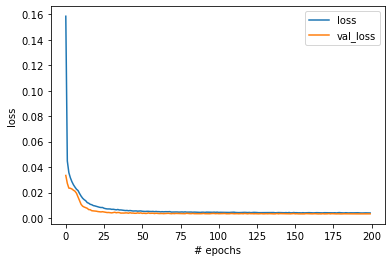

In [12]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [27]:
print('Actual: ', test_target[:10].T)
print('Predicted: ', predicted_result[:10].T)

Actual:  [[0.31535756 0.12426729 0.45955451 0.00820633 0.02813599 0.0890973
  0.06682298 0.08206331 0.34701055 0.00937866]]
Predicted:  [[0.35250843 0.08192951 0.31465542 0.00706813 0.02513757 0.1017492
  0.0350661  0.08230229 0.4290486  0.0122084 ]]


In [29]:
print('Actual inverse scaled: ',scaler_target.inverse_transform(test_target[:10]).T)
print('Actual inverse scaled: ',scaler_target.inverse_transform(predicted_result[:10]).T)

Actual inverse scaled:  [[27.  10.7 39.3  0.8  2.5  7.7  5.8  7.1 29.7  0.9]]
Actual inverse scaled:  [[30.168968    7.0885873  26.940107    0.70291126  2.244235    8.779206
   3.0911384   7.120385   36.697845    1.1413767 ]]


In [32]:
my_data_set = [1,56,156,42,0,1,0]

my_data_set = scaler_data.transform([my_data_set])

result = model.predict(my_data_set)

print('Result : ', result)

predicted = scaler_target.inverse_transform(result)

print('Predicted Result : ', predicted)

Result :  [[0.0899533]]
Predicted Result :  [[7.773017]]
